<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/RNN/Autoregressive_Linear_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu -U

     |████████████████████████████████| 320.4MB 52kB/s 


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

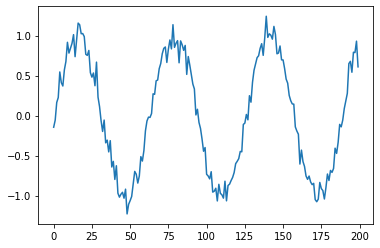

In [23]:
#synthetic dataset
noise = np.random.randn(200)*0.1
series = np.sin(0.1*np.arange(200))+noise
plt.plot(series)

In [24]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:",X.shape,"Y.shape",Y.shape)

X.shape: (190, 10) Y.shape (190,)


In [25]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

In [26]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 33ms/step - loss: 1.9542 - val_loss: 0.0854
Epoch 2/80
3/3 [==============================] - 0s 9ms/step - loss: 0.3897 - val_loss: 0.7465
Epoch 3/80
3/3 [==============================] - 0s 9ms/step - loss: 0.8381 - val_loss: 0.4070
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.2274 - val_loss: 0.0395
Epoch 5/80
3/3 [==============================] - 0s 9ms/step - loss: 0.1589 - val_loss: 0.2299
Epoch 6/80
3/3 [==============================] - 0s 9ms/step - loss: 0.3556 - val_loss: 0.1610
Epoch 7/80
3/3 [==============================] - 0s 10ms/step - loss: 0.1480 - val_loss: 0.0224
Epoch 8/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0496 - val_loss: 0.1103
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1464 - val_loss: 0.0940
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0898 - val_loss: 0.0213
Epoch 11/80
3/3 [===================

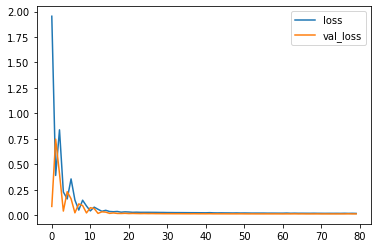

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [28]:
#Validate
target = Y[-N//2:]
predictions = []

last_x = X[-N//2]

while len(predictions) < len(target):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p



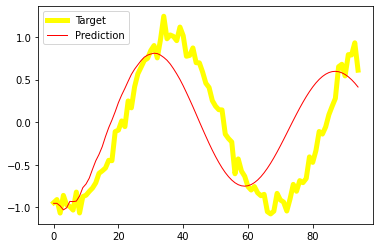

In [29]:
plt.plot(target,label="Target",linewidth=5,c='yellow')
plt.plot(predictions,label="Prediction",c='red',linewidth=1)
plt.legend()